# Multipe Linear Regression - Advertising

In [12]:
import numpy as np
import pandas as pd

In [5]:
df=pd.read_csv('/home/student/Downloads/advertising.xls')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [32]:
x=df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [33]:
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

<AxesSubplot: xlabel='TV', ylabel='Sales'>

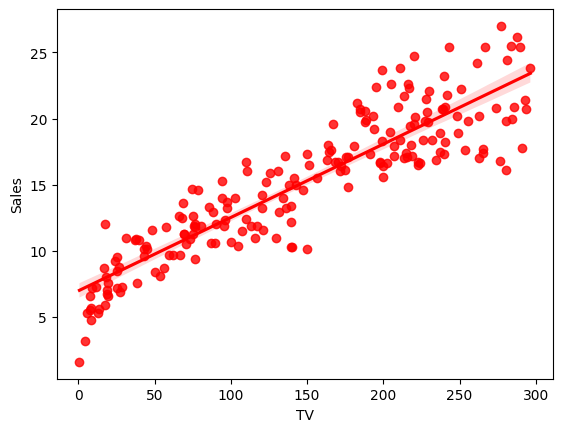

In [34]:
#TV vs sales
import seaborn as sns
sns.regplot(x=df['TV'],y=y,color='red')

<AxesSubplot: xlabel='Radio', ylabel='Sales'>

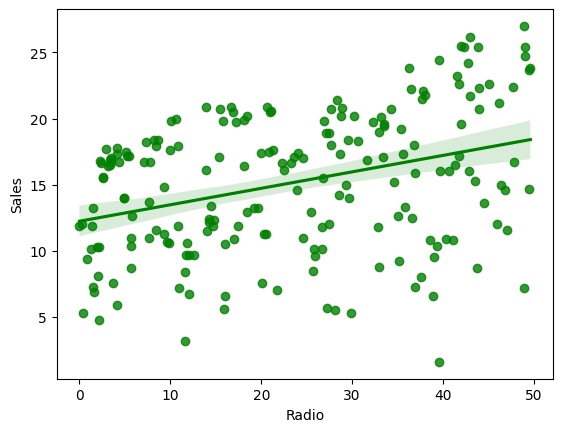

In [35]:
#Radio vs sales
import seaborn as sns
sns.regplot(x=df['Radio'],y=y,color='green')

<AxesSubplot: xlabel='Newspaper', ylabel='Sales'>

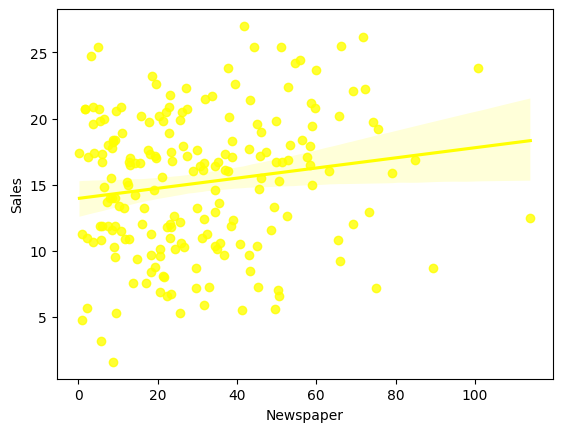

In [36]:
#Newspaper vs sales
import seaborn as sns
sns.regplot(x=df['Newspaper'],y=y,color='yellow')

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [38]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([17.15991908, 20.53369503, 23.68914396,  9.5191455 , 21.60736836,
       12.78101318, 21.08636345,  8.76054246, 17.11499951, 16.68789636,
        8.97584663,  8.57645026, 18.33212325,  8.17863567, 12.64605571,
       14.94486946,  8.34939536, 17.83858948, 11.12172174, 20.37740648,
       20.9483297 , 13.04035779, 11.01360656, 22.51142595,  9.40369784,
        7.98591291, 20.86943368, 13.77882255, 10.83407064,  8.00419229,
       15.88597618, 10.7027424 , 20.9521718 , 10.84679243, 21.50720813,
       21.07347295, 12.22673775, 22.85273767, 12.57698182,  6.54597206,
       11.93411853, 15.23490068, 10.07411153,  9.52159696, 17.11786382,
        7.28032677, 10.49404864, 15.24356754, 11.20742176, 11.78392665,
       14.01472163, 14.59884572, 10.82722434,  9.55839415,  9.03749681,
       12.51183313, 10.52551021, 25.01900824,  7.99334943, 15.73916263])

In [47]:
print(model.predict([[8.6,2.1,1.0]]))

[5.42824533]


/home/student/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
df1=pd.DataFrame({'Actual values':y_test,'Predicted values':y_pred})
df1

,Actual values,Predicted values
95,16.9,17.159919
15,22.4,20.533695
30,21.4,23.689144
158,7.3,9.519146
128,24.7,21.607368
115,12.6,12.781013
69,22.3,21.086363
170,8.4,8.760542
174,16.5,17.115000
45,16.1,16.687896


In [48]:
#intercept 
print('intercept:',model.intercept_)

intercept: 4.743766701589685


In [50]:
#slope
print(list(zip(x,model.coef_)))

[('TV', 0.05358869132706914), ('Radio', 0.10270676778771287), ('Newspaper', 0.007931667677316324)]


In [51]:
#Performance Evaluation
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
error=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print('mean absolute error:',error)
print('mean absolute percentage error:',mape)
print('mean squared error:',mse)
print('root mean squared error:',rmse)
print('r2 score:',score)

mean absolute error: 1.1594875061090582
mean absolute percentage error: 0.10536440823029307
mean squared error: 2.541624036229147
root mean squared error: 1.5942471691143587
r2 score: 0.9091484341849799
